# Tracé d'un graphique à partir de données expérimentales. Obtention des droites de pentes min et max. 


## Introduction

Ceci est une proposition de méthode, ne pas hésiter à commenter/améliorer !

On utilise un exemple de tracé de loi linéaire entre masse suspendue à un ressort et son allongement. L'objectif est de vérifier expérimentalement cette loi. 
Pour les données, on peut importer un fichier texte contenant les points de mesure et leurs incertitudes (ficher texte à mettre dans le même répertoire que le notebook), ou alors on peut aussi rentrer directement les données dans des listes au début du notebook.

Dans un premier temps, on importe les bibliothèques python nécessaires au traitement des données, à l'affichage des graphiques et à l'analyse statistique. 

In [35]:
# import de la bibliothèque numpy (gestion de matrices et routines mathématiques) en lui donnant le surnom np
import numpy as np
import matplotlib
# import de la bibliothèque matplotlib (graphiques) en lui donnant le surnom plt
import matplotlib.pyplot as plt
# import de la bibliothèque statstics (graphiques) en lui donnant le surnom st
import statistics as st
import pandas as pd

Ensuite, on veut entrer les données expérimentales, avec leurs erreurs, et éventuellement faire des calculs indirects pour obtenur les choses que l'on veut tracer.
Plusieurs solution : 
- import à partir d'un fichier tete (*.txt) correctement formatté, à placer dans le même répertoire que le notebook, ou en mettant le chemin approprié
- import à partir de données Excel formattées : read_excel(io[, sheet_name, header, names, ...])
- entrée des données directement dans un dictionnaire { "intitulé" : tableau Numpy, ...}

Les données sont ensuite rangées dans un objet DataFrame de la librairie Pandas, pour un affichage et une gestion des données optimales.

In [36]:
F, allongement, DF, Dl = np.loadtxt('F_l.txt', unpack = True, usecols = (0, 1, 2, 3), delimiter = '\t', skiprows = 1)


<class 'FileNotFoundError'>: F_l.txt not found.

In [38]:
# entrée des données numériques dans des tableaux Numpy

g = 9.81 # m.s-²

masse = np.array([0, 50, 100, 150, 200, 250, 300]) # en grammes

allongement = np.array([0, 2.1, 4.35, 6.7, 9, 11.3, 13.8]) # en cm



Dm = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

Dl = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

F = masse / 1000 * g
DF = Dm / 1000 * g


In [39]:
# création de l'objet DataFrame de la librairie Pandas

dict = {"F (N)" : F,
       "l - $l_0$ (cm)" : allongement,
        "erreur " + chr(948) + "F (N)" : DF,
        "erreur " + chr(948) + "l - $l_0$ (cm)" : Dl}


# création d'un objet DataFrame de la librairie Pandas.
data = pd.DataFrame(dict)
data # visualisation du tableau de valeurs

,F (N),l - $l_0$ (cm),erreur δF (N),erreur δl - $l_0$ (cm)
0,0.0000,0.00,0.004905,0.1
1,0.4905,2.10,0.004905,0.1
2,0.9810,4.35,0.004905,0.1
3,1.4715,6.70,0.004905,0.1
4,1.9620,9.00,0.004905,0.1
5,2.4525,11.30,0.004905,0.1
6,2.9430,13.80,0.004905,0.1


## Affichage des données expérimentales


<AxesSubplot:title={'center':"Force en fonction de l'allongement"}, xlabel='l - $l_0$ (cm)', ylabel='F (N)'>

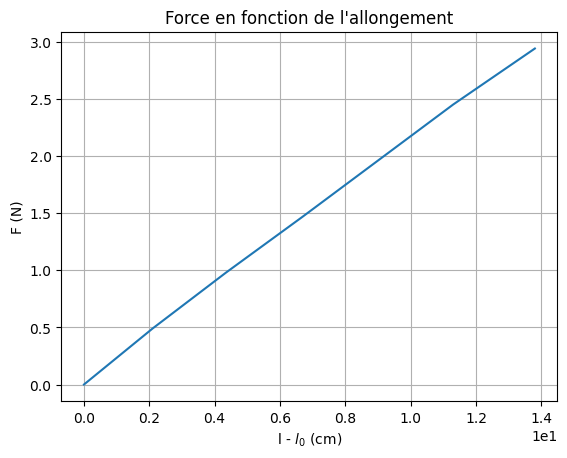

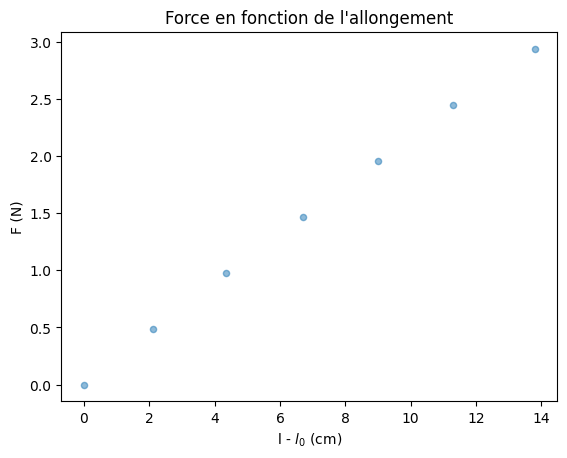

In [40]:
#Tracé de la caractéristique avec titre, axes et unités
#matplotlib.style.use("seaborn")

fig, ax = plt.subplots()
ax.plot(data["l - $l_0$ (cm)"], data["F (N)"])

# Ecriture scientifique pour l'affichage de l'intensité
ax.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
ax.set_xlabel("l - $l_0$ (cm)")
ax.set_ylabel("F (N)")
ax.grid(True)
ax.set_title("Force en fonction de l'allongement")

# ou la fonction plot intégrée au DataFrame où on accède directement aux données par leur intitulé :

data.plot.scatter(x="l - $l_0$ (cm)", y="F (N)", alpha=0.5, title="Force en fonction de l'allongement")

## Calcul de la régression linéaire
On cherche maintenant l'équation de la droite de regression linéaire de ces données:

In [41]:
# Regression linéaire pour la modélisation
coefficients = np.polyfit(data["l - $l_0$ (cm)"], data["F (N)"], 1)
print (coefficients)

[0.21300222 0.03373499]


In [42]:
# On réduit le nombre de chiffres significatifs et on rajoute les unités. 
pente = coefficients[0]
ordonnee_origine = coefficients[1]
pente = round(pente,5)
ordonnee_origine_a = round (ordonnee_origine,2)
print ("L'équation de la droite de régression est : F=",ordonnee_origine_a,"N + ", pente,"* allongement (cm)")

print(f"raideur expérimentale : k = {pente * 100} N.m-1") 

L'équation de la droite de régression est : F= 0.03 N +  0.213 * allongement (cm)
raideur expérimentale : k = 21.3 N.m-1


## Affichage du modèle
On veut maintenant rajouter le modèle linéaire sur la figure des points expérimentaux. 

Si on veut rajouter l'équation du modèle, on peut rajouter la commande suivante avant d'afficher le graphique:
plt.text(0.0001,1.2,"F (N) =" + str(ordonnee_origine_a)+ str(pente)+ "allongement (cm)")


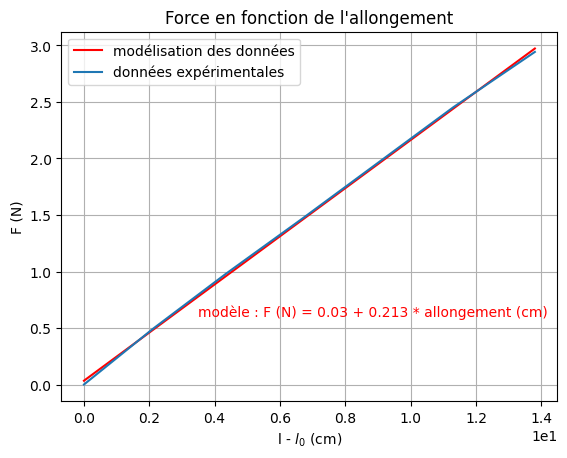

<Figure size 640x480 with 0 Axes>

In [43]:
F_modele = ordonnee_origine + pente * data["l - $l_0$ (cm)"]

plt.plot(data["l - $l_0$ (cm)"], F_modele,'-r', label="modélisation des données")
plt.plot(data["l - $l_0$ (cm)"], data["F (N)"], label="données expérimentales")

plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
plt.xlabel("l - $l_0$ (cm)")
plt.ylabel("F (N)")
plt.legend() 
plt.grid(True)
plt.title("Force en fonction de l'allongement")

plt.text(3.5,0.6,"modèle : F (N) = " + str(ordonnee_origine_a) + " + " + str(pente)+ " * allongement (cm)",color='r')  
plt.show() 
plt.savefig('Hooke.png')

## Barres d'erreurs
On cherche maintenant à rajouter les barres d'erreurs.

Text(0.5, 1.0, "Force en fonction de l'allongement")

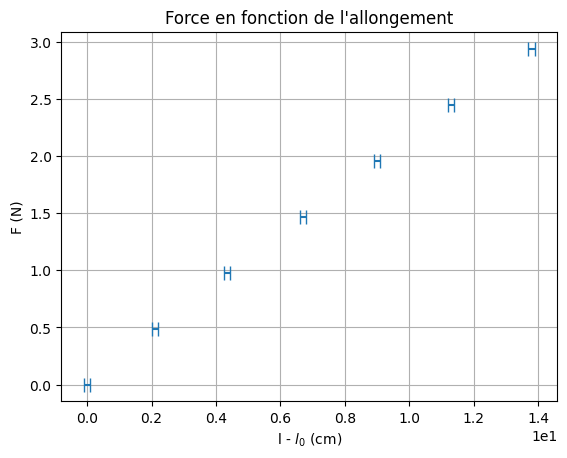

In [44]:
# plt.errorbar(data["l - $l_0$ (cm)"], data["F (N)"], xerr = data["erreur " + chr(948) + "l - $l_0$ (cm)"], yerr = data["erreur " + chr(948) + "F (N)"], capsize=5, fmt = 'none')

plt.errorbar(data["l - $l_0$ (cm)"], data["F (N)"], xerr = data["erreur " + chr(948) + "l - $l_0$ (cm)"], capsize=5, fmt = 'none')


plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
plt.xlabel("l - $l_0$ (cm)")
plt.ylabel("F (N)")
plt.grid(True)
plt.title("Force en fonction de l'allongement")

In [46]:
# définition de la fonction de fit

def linear_func(p, x):
    m, c = p
    return m*x + c

In [47]:
from scipy.odr import *

# création du modèle
linear_model = Model(linear_func)

# Création d'un objet RealData du module scipy.odr
data = RealData(allongement, F, sx = Dl, sy = DF)

# Préparation de la régression
odr = ODR(data, linear_model, beta0=[0., 1.])

# Lancement de la regression linéaire orthogonale.
out = odr.run()

# affichage des résultats
out.pprint()

Beta: [0.21309073 0.03313757]
Beta Std Error: [0.00199335 0.0162866 ]
Beta Covariance: [[ 3.22287918e-06 -2.17544180e-05]
 [-2.17544180e-05  2.15147248e-04]]
Residual Variance: 1.2328915709225348
Inverse Condition #: 0.2869356974908875
Reason(s) for Halting:
  Sum of squares convergence


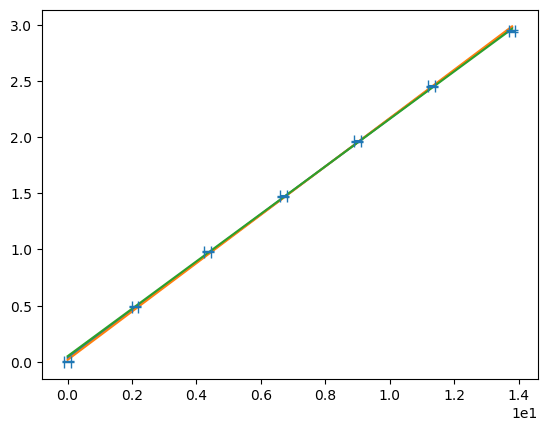

In [48]:
# affichage des droites de régression de pentes min et max
# affichage des points avec leurs barres d'erreur en x et y
x = allongement
y = F
y_reg = out.beta[1] + out.beta[0] * allongement
y_low = out.beta[1] - out.sd_beta[1] + (out.beta[0] + out.sd_beta[0])* np.asarray(x)
y_high = out.beta[1] + out.sd_beta[1] + (out.beta[0] - out.sd_beta[0])* np.asarray(x)


plt.plot(x, y_reg)
plt.plot(x, y_low)
plt.plot(x, y_high)
plt.errorbar(x, y, xerr=Dl, yerr = DF, capsize=4,fmt = 'none')
plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))